In [1]:
from basata.datasets import get_data
from basata.supervised import *

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use("classic")
sns.set(style ='darkgrid')
random_seed_val = 100

In [2]:
df = get_data("titanic")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


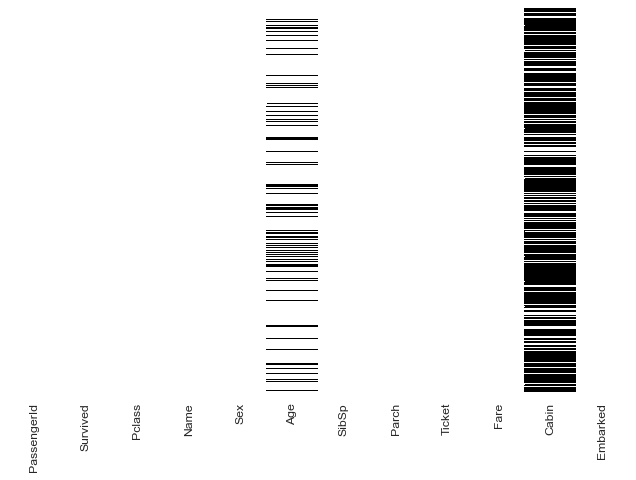

In [5]:
null(df)

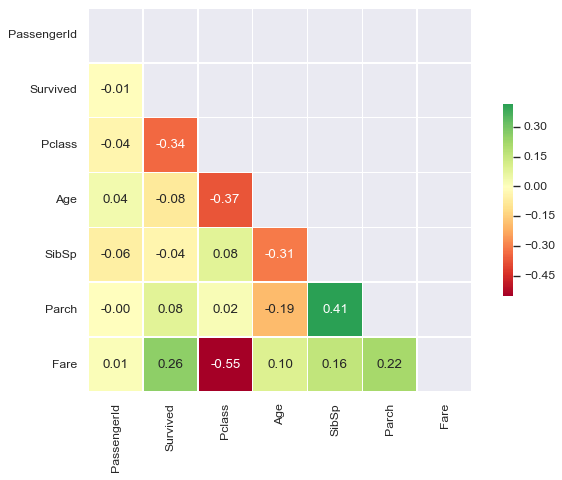

In [6]:
correlation(df)

#### EDA

In [7]:
eda(df)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Train-Test Split

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Survived"])
y = df.loc[:,['Survived']]

random_seed_val = 100

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed_val, stratify=y)


#### Preprocess

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=4)

def preprocess(DataFrame):
    
    # Iterate through dataframe and extract title from name column
    DataFrame['Title'] = DataFrame['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # Replace titles with more common titles
    DataFrame['Title'] = DataFrame['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    DataFrame['Title'] = DataFrame['Title'].replace('Mlle', 'Miss')
    DataFrame['Title'] = DataFrame['Title'].replace('Ms', 'Miss')
    DataFrame['Title'] = DataFrame['Title'].replace('Mme', 'Mrs')

    # Drop columns
    DataFrame.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

    # Create dummies
    DataFrame = pd.get_dummies(DataFrame, columns=['Pclass', 'Sex', 'Embarked', 'Title'], drop_first=False)
    
    # Imouter (Handling missing values)
    column = DataFrame.columns
    DataFrame = pd.DataFrame(imputer.fit_transform(DataFrame), columns = column)
    
    # Round age
    DataFrame['Age'] = np.round(DataFrame['Age'].values).astype('int64')

    # Create bins from age columm in a new column
    DataFrame['AgeBin'] = pd.qcut(DataFrame['Age'], q=5, labels=False)

    DataFrame.dropna()

    return DataFrame

X_train = preprocess(X_train)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [12]:
X_train.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,AgeBin
0,71,0.0,0.0,34.6542,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
1,16,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
2,26,0.0,0.0,7.8958,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
3,30,0.0,0.0,7.2292,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,26,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


#### Feature importance

,feature,feature_importance
0,Fare,0.231082
1,Age,0.190736
2,Title_Mr,0.112288
3,Sex_male,0.074151
4,Sex_female,0.063906
5,SibSp,0.057353
6,AgeBin,0.052928
7,Pclass_3,0.042429
8,Parch,0.035474
9,Pclass_1,0.028260


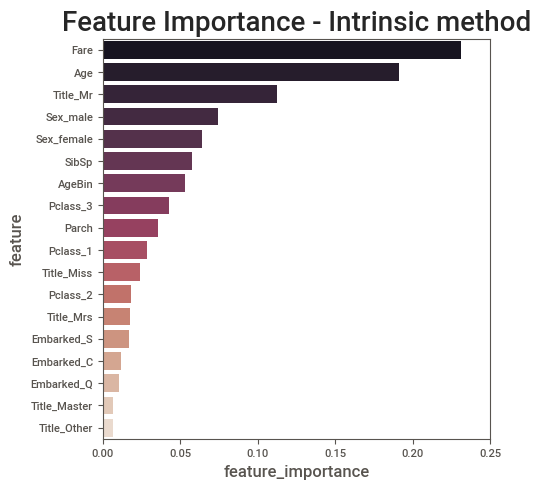

In [13]:
# random forest for feature importance on a classification problem
from sklearn.ensemble import RandomForestClassifier

# define the model
rf = RandomForestClassifier(n_jobs=-1, random_state=5)

# fit the model
rf.fit(X_train, y_train)

#Create table
FID(X_train, rf)

In [14]:
compare_models(X_train, y_train)

Learning rate set to 0.008911
0:	learn: 0.6880638	total: 54.5ms	remaining: 54.5s
1:	learn: 0.6827569	total: 56.5ms	remaining: 28.2s
2:	learn: 0.6776709	total: 57.5ms	remaining: 19.1s
3:	learn: 0.6727422	total: 58.9ms	remaining: 14.7s
4:	learn: 0.6674161	total: 60.6ms	remaining: 12.1s
5:	learn: 0.6621419	total: 61.8ms	remaining: 10.2s
6:	learn: 0.6574225	total: 62.9ms	remaining: 8.92s
7:	learn: 0.6526148	total: 63.8ms	remaining: 7.91s
8:	learn: 0.6473780	total: 64.7ms	remaining: 7.12s
9:	learn: 0.6435848	total: 65.7ms	remaining: 6.5s
10:	learn: 0.6393844	total: 66.8ms	remaining: 6s
11:	learn: 0.6350704	total: 68ms	remaining: 5.59s
12:	learn: 0.6316210	total: 69.3ms	remaining: 5.26s
13:	learn: 0.6276823	total: 70.4ms	remaining: 4.96s
14:	learn: 0.6236359	total: 71.3ms	remaining: 4.68s
15:	learn: 0.6197384	total: 72.2ms	remaining: 4.44s
16:	learn: 0.6173207	total: 72.6ms	remaining: 4.2s
17:	learn: 0.6125758	total: 73.7ms	remaining: 4.02s
18:	learn: 0.6088230	total: 74.6ms	remaining: 3.85s

,Random Forest,Gradient Boosting,AdaBoost,Decision Tree,XGBoost,CatBoost,LightGBM
0,Fare,Sex_male,Fare,Sex_female,Title_Mr,Fare,Fare
1,Age,Fare,Age,Fare,Sex_female,Title_Mr,Age
2,Sex_female,Sex_female,SibSp,Age,Pclass_3,Age,SibSp
3,Title_Mr,Title_Mr,Parch,Pclass_3,Pclass_1,Sex_male,Parch
4,Sex_male,Age,Title_Master,SibSp,SibSp,AgeBin,Embarked_S
5,SibSp,Pclass_3,Pclass_1,AgeBin,Title_Other,SibSp,Pclass_3
6,AgeBin,SibSp,Pclass_3,Pclass_1,Embarked_S,Sex_female,Title_Mr
7,Pclass_3,Pclass_1,Title_Mrs,Embarked_C,Title_Master,Pclass_3,Sex_female
8,Parch,Embarked_S,Sex_male,Embarked_S,Parch,Pclass_1,Pclass_1
9,Pclass_1,Title_Other,Title_Mr,Parch,Fare,Parch,Embarked_C


#### Model Training

In [15]:
X_test = preprocess(X_test)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Learning rate set to 0.008911
0:	learn: 0.6880149	total: 804us	remaining: 804ms
1:	learn: 0.6828084	total: 1.68ms	remaining: 839ms
2:	learn: 0.6782369	total: 2.58ms	remaining: 859ms
3:	learn: 0.6724202	total: 3.52ms	remaining: 878ms
4:	learn: 0.6670325	total: 4.39ms	remaining: 874ms
5:	learn: 0.6622282	total: 5.4ms	remaining: 895ms
6:	learn: 0.6581784	total: 6.46ms	remaining: 917ms
7:	learn: 0.6534060	total: 7.75ms	remaining: 961ms
8:	learn: 0.6492707	total: 8.99ms	remaining: 990ms
9:	learn: 0.6449620	total: 9.92ms	remaining: 982ms
10:	learn: 0.6399401	total: 10.9ms	remaining: 976ms
11:	learn: 0.6351674	total: 11.8ms	remaining: 973ms
12:	learn: 0.6310454	total: 13.1ms	remaining: 992ms
13:	learn: 0.6268990	total: 14.2ms	remaining: 1000ms
14:	learn: 0.6236868	total: 15.2ms	remaining: 1s
15:	learn: 0.6197263	total: 16.3ms	remaining: 1s
16:	learn: 0.6158244	total: 17.6ms	remaining: 1.02s
17:	learn: 0.6121739	total: 18.8ms	remaining: 1.02s
18:	learn: 0.6085290	total: 20ms	remaining: 1.03s
1

ROC curves: 100%|██████████| 10/10 [00:00<00:00, 629.73it/s]


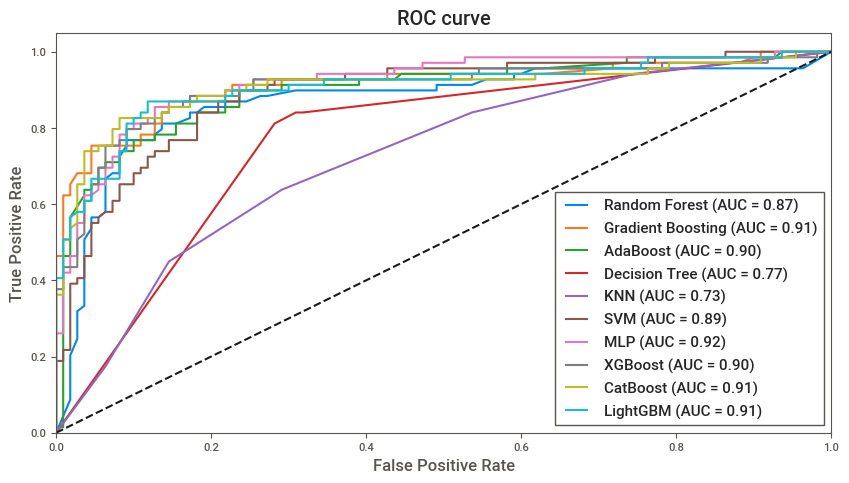

Precision Recall Curve: 100%|██████████| 10/10 [00:00<00:00, 34.93it/s]


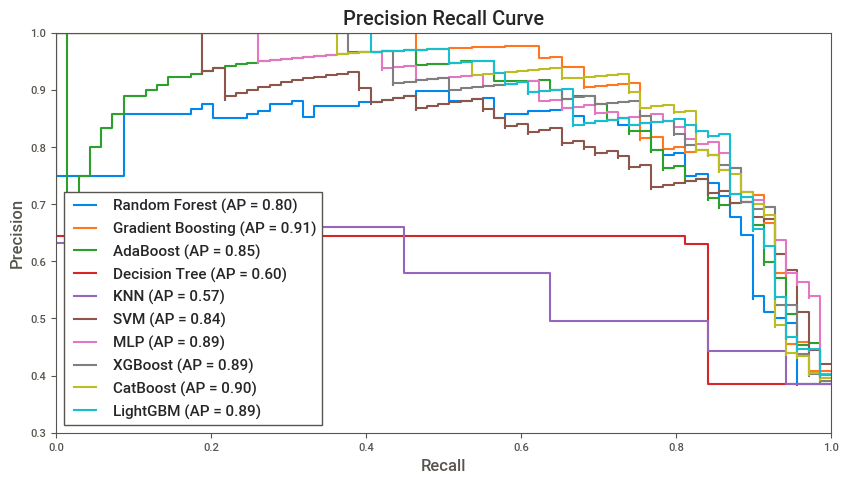

,Accuracy,Recall,Precision,F1,Balanced Accuracy,ROC AUC
Gradient Boosting,0.849162,0.855072,0.776316,0.813793,0.850264,0.912385
MLP,0.849162,0.869565,0.769231,0.816327,0.852964,0.919433
XGBoost,0.849162,0.884058,0.762500,0.818792,0.855665,0.904282
LightGBM,0.849162,0.869565,0.769231,0.816327,0.852964,0.906390
CatBoost,0.837989,0.855072,0.756410,0.802721,0.841173,0.907181
Random Forest,0.826816,0.855072,0.737500,0.791946,0.832082,0.870619
SVM,0.815642,0.739130,0.772727,0.755556,0.801383,0.890975
AdaBoost,0.804469,0.840580,0.707317,0.768212,0.811199,0.898946
Decision Tree,0.754190,0.811594,0.643678,0.717949,0.764888,0.772003
KNN,0.681564,0.637681,0.578947,0.606897,0.673386,0.725033


In [16]:
automl(X_test, X_train, y_train, y_test, 100)

#### Tuning

In [17]:
final_model = tuning(X_train, y_train, model='gbdt', GridSearch=False)

The RandomizedSearchCV found the following best parameters:
Best score for gbdt: 0.8187826258248794
Best estimator for gbdt: GradientBoostingClassifier(min_samples_leaf=2, n_estimators=50)


In [18]:
X = preprocess(X)

final_model.fit(X, y)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.5, 1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200,
                                                         500]},
                   scoring=make_scorer(accuracy_score))

#### XAI

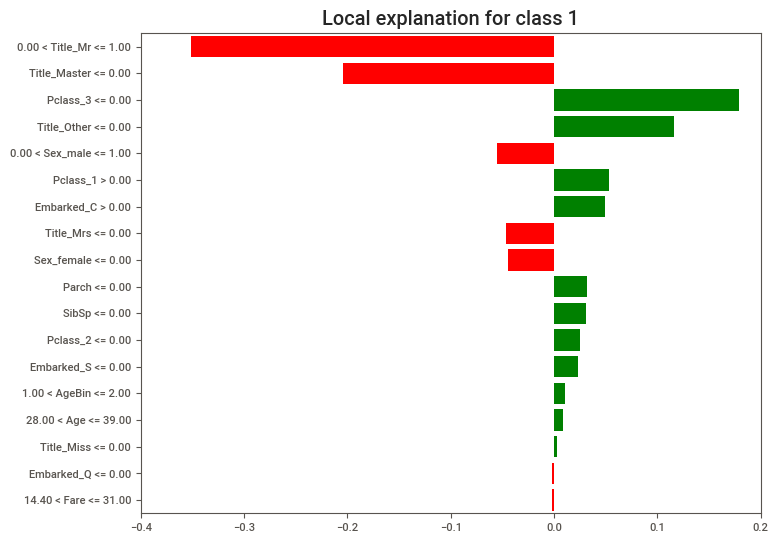

In [19]:
xai(X_train, X_test, model=final_model)